In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from generator import RoadNetwork
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import pandas as pd
import networkx as nx
import numpy as np
from tqdm import tqdm

from models import Toast

In [2]:
# load dataset and bring it in format for toast
network = RoadNetwork()
network.load("../osm_data/porto")
df = pd.read_csv("../datasets/trajectories/Porto/road_segment_map_final.csv", sep=";", usecols=["id", "cpath"])

In [3]:
print(network.gdf_nodes.shape)
#dG = nx.DiGraph(network.G)
dG = nx.line_graph(network.G, create_using=nx.DiGraph)
index = np.arange(2, len(list(dG.nodes))+2) # index shifted, since 0 and 1 are reserved for mask pad tokens
nx.set_node_attributes(dG, dict(zip(list(dG.nodes), index)), name="index")


(5358, 6)


In [ ]:
nodes = list(dG.nodes(data=True))

for n, d in nodes:
    print(network.gdf_edges.loc[n, :]["highway"])
    break


In [1]:
network.gdf_nodes[network.gdf_nodes["highway"]=="mini_roundabout"]

NameError: name 'network' is not defined

In [4]:
torch.cuda.is_available()

True

In [5]:
toast = Toast(dG, network.gdf_edges)
toast.train(num_walks=20)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  20 out of  20 | elapsed:  5.1min finished
/dstore/home/pheinemeyer/Road-Network-Embedding-Generator/models/toast.py:57: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646756402876/work/torch/csrc/utils/tensor_new.cpp:210.)
  batch_types = torch.Tensor(batch_types).to(self.device)


Epoch: 0, iter 2500, avg_loss: 1.0869889979600906, avg_context_loss: 1.0620967585086822,  avg_type_loss: 0.024892239493131636
Epoch: 0, iter 5000, avg_loss: 1.0119060326695442, avg_context_loss: 0.9881755385637283,  avg_type_loss: 0.02373049406912178
Epoch: 0, iter 7500, avg_loss: 0.9766286399205526, avg_context_loss: 0.9536364086985588,  avg_type_loss: 0.022992231274520356
Epoch: 0, iter 10000, avg_loss: 0.9579116338431836, avg_context_loss: 0.9349794899985194,  avg_type_loss: 0.022932143868971615
Epoch: 0, iter 12500, avg_loss: 0.9463318736934662, avg_context_loss: 0.923191416438818,  avg_type_loss: 0.023140457263067366
Epoch: 0, iter 15000, avg_loss: 0.9355294375936191, avg_context_loss: 0.9125447696000337,  avg_type_loss: 0.02298466803971678
Epoch: 0, iter 17500, avg_loss: 0.9288981340238026, avg_context_loss: 0.9057827463967459,  avg_type_loss: 0.02311538764797151
Epoch: 0, iter 20000, avg_loss: 0.9239716605916619, avg_context_loss: 0.9008623343877494,  avg_type_loss: 0.0231093262

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  20 out of  20 | elapsed:  5.2min finished


Epoch: 1, iter 2500, avg_loss: 0.8413522377938032, avg_context_loss: 0.8174359921008348,  avg_type_loss: 0.023916245751082896
Epoch: 1, iter 5000, avg_loss: 0.8319002257697284, avg_context_loss: 0.8073533594958484,  avg_type_loss: 0.024546866443380715
Epoch: 1, iter 7500, avg_loss: 0.8309422709268828, avg_context_loss: 0.8060587396067878,  avg_type_loss: 0.024883531313141187
Epoch: 1, iter 10000, avg_loss: 0.8351444435967132, avg_context_loss: 0.8107007348317653,  avg_type_loss: 0.024443708800897003
Epoch: 1, iter 12500, avg_loss: 0.8352941818575561, avg_context_loss: 0.810858448638618,  avg_type_loss: 0.024435733205378056
Epoch: 1, iter 15000, avg_loss: 0.8328875106679896, avg_context_loss: 0.8084129560288041,  avg_type_loss: 0.024474554635956883
Epoch: 1, iter 17500, avg_loss: 0.8330444859018283, avg_context_loss: 0.808401501976805,  avg_type_loss: 0.02464298396195684
Epoch: 1, iter 20000, avg_loss: 0.8334478356323205, avg_context_loss: 0.8087251931250096,  avg_type_loss: 0.024722642

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  20 out of  20 | elapsed:  5.2min finished


Epoch: 2, iter 2500, avg_loss: 0.7510272790849208, avg_context_loss: 0.7236459398657084,  avg_type_loss: 0.027381338972598316
Epoch: 2, iter 5000, avg_loss: 0.7498429400283844, avg_context_loss: 0.7204401954893023,  avg_type_loss: 0.02940274466983974
Epoch: 2, iter 7500, avg_loss: 0.7464244050614536, avg_context_loss: 0.716856334176908,  avg_type_loss: 0.02956807096103827
Epoch: 2, iter 10000, avg_loss: 0.7468242036985233, avg_context_loss: 0.7168618450889364,  avg_type_loss: 0.02996235874146223
Epoch: 2, iter 12500, avg_loss: 0.7482579767017067, avg_context_loss: 0.7185484425388277,  avg_type_loss: 0.029709534285515548
Epoch: 2, iter 15000, avg_loss: 0.7434292124856263, avg_context_loss: 0.7132072307359427,  avg_type_loss: 0.030221981925641496
Epoch: 2, iter 17500, avg_loss: 0.7455005574180612, avg_context_loss: 0.7153420304016344,  avg_type_loss: 0.03015852718065892
Epoch: 2, iter 20000, avg_loss: 0.7450673679281026, avg_context_loss: 0.714898129866831,  avg_type_loss: 0.030169238204

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  20 out of  20 | elapsed:  5.3min finished


Epoch: 3, iter 2500, avg_loss: 0.6490672806207091, avg_context_loss: 0.6143242153625935,  avg_type_loss: 0.034743065123260024
Epoch: 3, iter 5000, avg_loss: 0.6377480433212593, avg_context_loss: 0.6004354946380481,  avg_type_loss: 0.0373125485714525
Epoch: 3, iter 7500, avg_loss: 0.6342901113481572, avg_context_loss: 0.5978510923831413,  avg_type_loss: 0.03643901893577228
Epoch: 3, iter 10000, avg_loss: 0.6380334905519616, avg_context_loss: 0.6012910893333611,  avg_type_loss: 0.0367424011411611
Epoch: 3, iter 12500, avg_loss: 0.6349910058028624, avg_context_loss: 0.598299628337212,  avg_type_loss: 0.036691377390511336
Epoch: 3, iter 15000, avg_loss: 0.6329041096016454, avg_context_loss: 0.5960867766707825,  avg_type_loss: 0.036817332834284754
Epoch: 3, iter 17500, avg_loss: 0.6285812831114446, avg_context_loss: 0.5917004037135414,  avg_type_loss: 0.036880879359080326
Epoch: 3, iter 20000, avg_loss: 0.6316607870593667, avg_context_loss: 0.5948340939041227,  avg_type_loss: 0.036826693181

In [8]:
toast = Toast(dG, network.gdf_edges)
toast.load_model("../model_states/toast/model_rw_init_epoch3.pt")

In [83]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X = toast.load_embed()[2:] # embedding for each node
# train simple classifier on 80% of data with cross validation
y = np.array([network.gdf_edges.loc[n]["highway_enc"] for n in dG.nodes])

mask = ((y==11) | (y==10) | (y==9) | (y==4) | (y==1) | (y==2) | (y==12) | (y==7)) # remove uncommon tags
X = X[~mask, :]
y = y[~mask]
print(np.unique(y, return_counts=True))

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 1)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

(array([0, 3, 5, 6, 8]), array([1680,  577, 5832, 1451, 1213]))
X_train dimension=  torch.Size([8602, 128])
X_test dimension=  torch.Size([2151, 128])
y_train dimension=  (8602,)
y_test dimension=  (2151,)


In [84]:
lm = linear_model.LogisticRegression(multi_class="multinomial", max_iter=1000)
lm.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [85]:
print(metrics.classification_report(y_test, lm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.17      0.28       343
           3       1.00      0.07      0.14       121
           5       0.57      0.98      0.72      1135
           6       0.73      0.21      0.33       305
           8       0.57      0.05      0.10       247

    accuracy                           0.58      2151
   macro avg       0.73      0.30      0.31      2151
weighted avg       0.65      0.58      0.49      2151



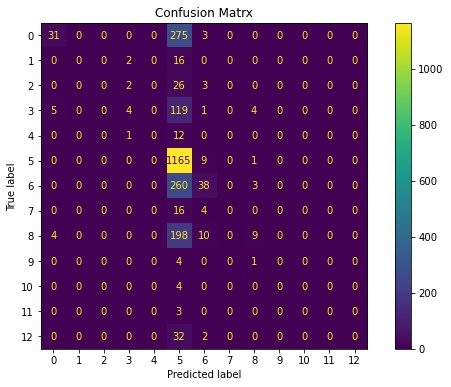

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp = metrics.plot_confusion_matrix(lm, X_test, y_test, ax = ax)